In [32]:
print("hello world")
%matplotlib inline 

hello world


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# Activation function : identity function
def activ_func_identity(x):
    return x

In [35]:
# Activation function : Sigmoid activation function
def activ_func_sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [36]:
# Derivative of the identity activation function
def activ_func_derivative_identity(x):
    return 1

In [37]:
# Derivative of Sigmoid activation function
def activ_func_derivative_sigmoid(x):
    return activ_func_sigmoid(x) * (1 - activ_func_sigmoid(x))

In [38]:
#dataset 
x1 = np.array([1, 2, 3])
x2 = np.array([2, 3, 4])
y_true = np.array([3, 5, 7])
b = 1

In [39]:
#initialize weight 
w1 = 0.5 
w2 = -0.5 
#learning rate 
lr = 0.001 

#Number of iterations for gradient descent 
iterations = 1000

In [40]:
#DataFrame to store values 
df1 = pd.DataFrame(columns=['dw1', 'dw2', 'db', 'w1', 'w2', 'b'])
# dw and db are the derivatives of loss function with respect to w and b respectively
# w and b are the weights and bias respectively

df2 = pd.DataFrame(columns=['loss', 'z', 'y_pred', 'dz', 'RMSE'])
#loss, Z, Y_pred, dZ, RMSE : are the loss, weighted sum, dZ, predicted output and root mean square error respectively
# dZ is the derivative of loss function with respect to Z
# Single layer model

In [41]:
def single_layer_model(x1, x2, w1, w2, b): 
    z = w1*x1 + w2*x2 + b 
    y_pred = activ_func_identity(z)
    return y_pred, z   

In [42]:
for i in range(iterations): 
    #forward propagation 
    y_pred, z = single_layer_model(x1, x2, w1, w2, b)

    #calculate loss 
    loss = (1/6)*np.sum((y_true - y_pred)**2)
    ## Note that loss is divided by 2 to make the derivation simpler
    ## For RMSE, loss is multiplied by 2 and then square rooted to get the RMSE usually used in regression problems

    RMSE = np.sqrt(loss*2)

    #Backward propagation
    dz = (y_pred - y_true) * activ_func_derivative_identity(z)
    dw1 = np.mean(dz*x1)
    dw2 = np.mean(dz*x2) 
    db = np.mean(dz)

    #update weights 
    w1 -= lr * dw1 
    w2 -= lr * dw2 
    b -= lr * db 

    # store the values in the DataFrame 
    df1.loc[i] = [dw1 , dw2, db, w1, w2, b]
    df2.loc[i] = [loss, z, y_pred, dz, RMSE]
    


In [43]:
print(df1)
print(df2)

           dw1        dw2        db        w1        w2         b
0   -10.333333 -14.833333 -4.500000  0.510333 -0.485167  1.004500
1   -10.177222 -14.607556 -4.430333  0.520511 -0.470559  1.008930
2   -10.023484 -14.385210 -4.361726  0.530534 -0.456174  1.013292
3    -9.872083 -14.166245 -4.294162  0.540406 -0.442008  1.017586
4    -9.722983 -13.950608 -4.227625  0.550129 -0.428057  1.021814
..         ...        ...       ...       ...       ...       ...
995  -0.056693   0.016579  0.073273  1.235821  0.459360  1.223539
996  -0.056686   0.016577  0.073263  1.235878  0.459344  1.223466
997  -0.056678   0.016575  0.073253  1.235935  0.459327  1.223392
998  -0.056671   0.016573  0.073244  1.235991  0.459311  1.223319
999  -0.056663   0.016571  0.073234  1.236048  0.459294  1.223246

[1000 rows x 6 columns]
          loss                                                  z  \
0    11.458333                                    [0.5, 0.5, 0.5]   
1    11.113916  [0.5444999999999999, 0.569666

In [44]:
df2.columns

Index(['loss', 'z', 'y_pred', 'dz', 'RMSE'], dtype='object')

In [45]:
# Plots
## Add initialization values to the DataFrame df1 - for plotting purposes
init_values = [0, 0, 0, 0.5, -0.5, 0.2]
df_init = pd.DataFrame([init_values])
df_init.columns = df1.columns

In [46]:
# Concatenate df_init and df1
df1 = pd.concat([df_init, df1]).reset_index(drop=True)

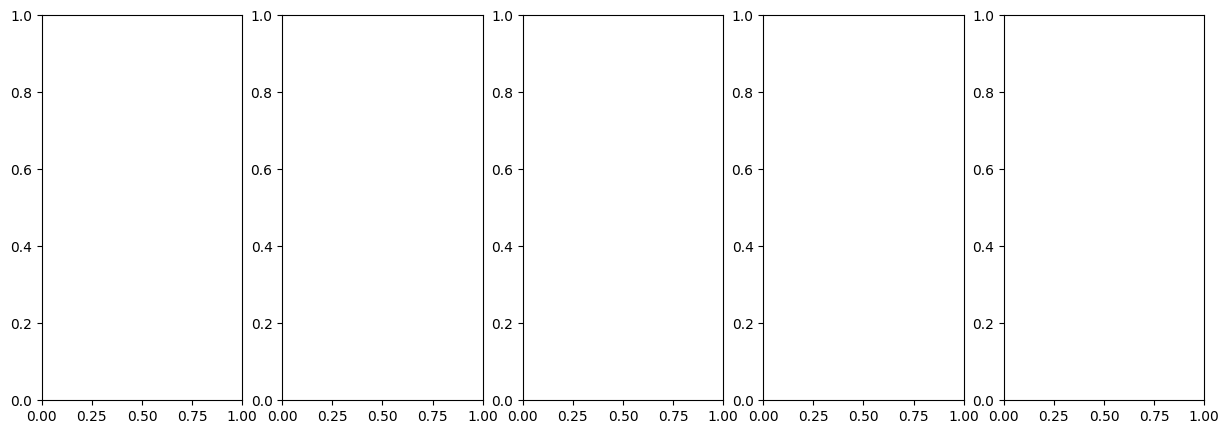

In [47]:
# Plots
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

In [59]:
# Plot w1
axs[0].plot(range(iterations+1), df1['w1'])
axs[0].set_title('W1 over iterations')
axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('W1')
plt.show(axs[0])

In [53]:
# Plot w2
axs[1].plot(range(iterations+1), df1['w2'])
axs[1].set_title('W2 over iterations')
axs[1].set_xlabel('Iterations')
axs[1].set_ylabel('W2')

Text(244.96168582375486, 0.5, 'W2')

In [54]:
# Plot b
axs[2].plot(range(iterations+1), df1['b'])
axs[2].set_title('b over iterations')
axs[2].set_xlabel('Iterations')
axs[2].set_ylabel('b')

Text(485.47892720306515, 0.5, 'b')

In [55]:
# Plot RMSE
axs[3].plot(range(iterations), df2['RMSE'])
axs[3].set_title('RMSE over iterations')
axs[3].set_xlabel('Iterations')
axs[3].set_ylabel('RMSE')

Text(739.1211685823758, 0.5, 'RMSE')

In [56]:
# Plot Y_true vs Y_pred (get last values of Y_pred at the last iteration)
y_pred_final = df2['y_pred'].tail(1).values[0]
y_true=np.array([3, 5, 7])
axs[4].scatter(y_true, y_pred_final)
axs[4].set_title('Predicted Y vs Observed Y')
axs[4].set_xlabel('Observed Y')
axs[4].set_ylabel('Predicted Y')

Text(966.5134099616859, 0.5, 'Predicted Y')

In [57]:

# Calculate linear regression between predicted and observed Y
slope, intercept = np.polyfit(y_true, y_pred_final, 1)

# Plot regression line
x = np.array([min(y_true), max(y_true)])
y = slope * x + intercept
axs[4].plot(x, y, color='red')

# Calculate R² and RMSE
r2 = r2_score(y_true, y_pred_final)
rmse = np.sqrt(mean_squared_error(y_true, y_pred_final))

# Show R² and RMSE on the plot
axs[4].text(0.05, 0.95, f'R² = {r2:.2f}\nRMSE = {rmse:.3f}', transform=axs[4].transAxes, verticalalignment='top')


Text(0.05, 0.95, 'R² = 0.97\nRMSE = 0.259')

<Figure size 640x480 with 0 Axes>

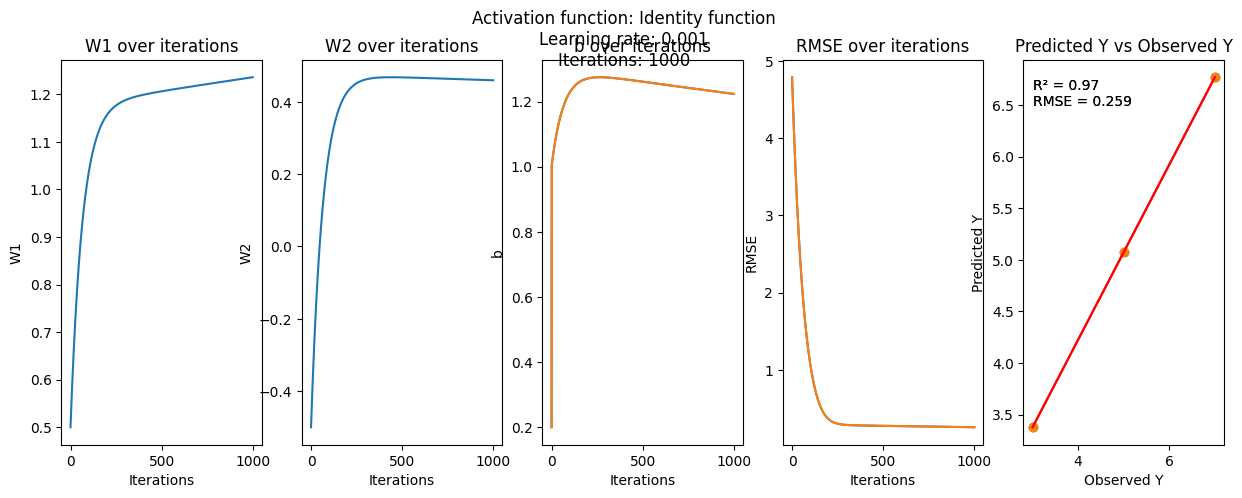

In [60]:
# Set a common title for all subplots
fig.suptitle("Activation function: Identity function\nLearning rate: 0.001\nIterations: 1000")
plt.tight_layout()  # Adjust the padding between and around the subplots
plt.show()
fig 

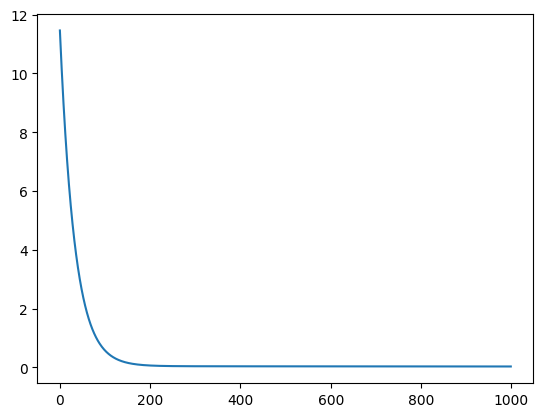

In [61]:
xlabel = []
ylabel = []
for i in range(iterations):
    xlabel.append(i)
    ylabel.append(df2['loss'][i])

plt.plot(xlabel, ylabel)
plt.show()

In [62]:
len(df1)
w1 = df1['w1'][1000]
w2 = df1['w2'][1000]
b = df1 ['b'][1000]
print(w1 , w2,  b)


1.2360481333707591 0.4592941125895888 1.2232459792188295


In [63]:
#predict function
def predict(x1_list, x2_list): 
    z = []
    for x1, x2 in zip (x1_list , x2_list): 
        z.append(w1*x1 + w2*x2 +b)
    return z 

x1_test = [1, 2, 3]
x2_test = [2, 3, 4]

y_test = predict(x1_test, x2_test)
print(y_test) 

[np.float64(3.3778823377687663), np.float64(5.073224583729115), np.float64(6.768566829689462)]
